In [1]:
# Importing the required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, load_iris, load_breast_cancer
from sklearn.model_selection import train_test_split

In the above code, we first import the necessary libraries: `numpy` for numerical computations, `matplotlib.pyplot` for data visualization, and `make_classification`, `load_iris`, and `load_breast_cancer` from `sklearn.datasets` to generate and load datasets.

Next, we generate a random dataset using the `make_classification` function from `sklearn.datasets`. We set the seed for reproducibility and create 100 samples with 2 informative features and no redundant features.

We also load two built-in datasets, namely the Iris dataset (`iris`) and the Breast Cancer dataset (`breast_cancer`), using the respective `load` functions from `sklearn.datasets`.

In [2]:
# Generating a random dataset
np.random.seed(42)  # Set the random seed for reproducibility
X_random, y_random = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0,
                                         n_clusters_per_class=1)
# make_classification generates a random classification dataset
# n_samples: Number of samples (instances) in the dataset
# n_features: Number of features (input variables) in the dataset
# n_informative: Number of informative features
# n_redundant: Number of redundant features
# n_clusters_per_class: Number of clusters per class (to control separation)


In [3]:
# Loading built-in datasets
iris = load_iris()  # Load the Iris dataset
breast_cancer = load_breast_cancer()  # Load the Breast Cancer dataset

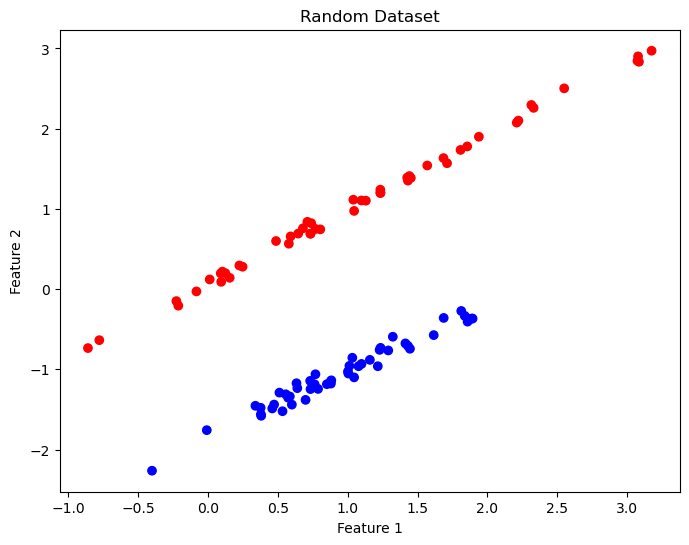

In [4]:
# Plotting the random dataset
plt.figure(figsize=(8, 6))  # Create a new figure with the specified size
plt.scatter(X_random[:, 0], X_random[:, 1], c=y_random, cmap='bwr')
# Scatter plot the random dataset
# X_random[:, 0]: First feature (column) of the random dataset
# X_random[:, 1]: Second feature (column) of the random dataset
# c=y_random: Color the data points based on the target labels
# cmap='bwr': Use the blue-white-red colormap for coloring
plt.title('Random Dataset')  # Set the title of the plot
plt.xlabel('Feature 1')  # Set the x-axis label
plt.ylabel('Feature 2')  # Set the y-axis label
plt.show()  # Display the plot


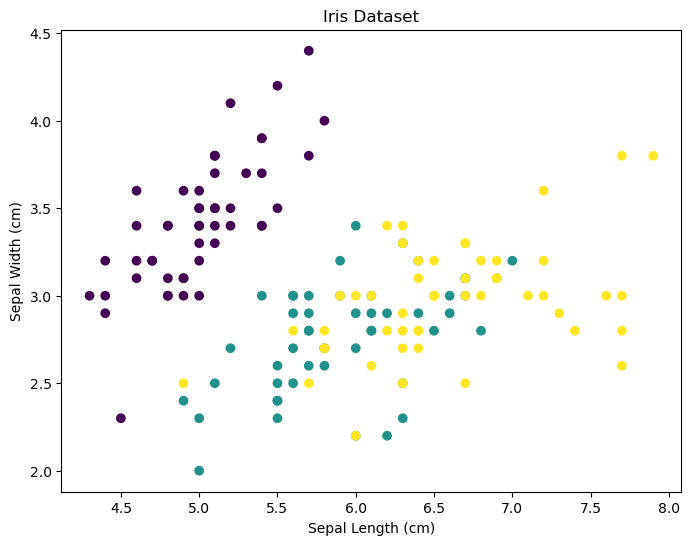

In [5]:
# Plotting the Iris dataset
plt.figure(figsize=(8, 6))  # Create a new figure with the specified size
plt.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target, cmap='viridis')
# Scatter plot the Iris dataset
# iris.data[:, 0]: First feature (column) of the Iris dataset
# iris.data[:, 1]: Second feature (column) of the Iris dataset
# c=iris.target: Color the data points based on the target labels
# cmap='viridis': Use the viridis colormap for coloring
plt.title('Iris Dataset')  # Set the title of the plot
plt.xlabel('Sepal Length (cm)')  # Set the x-axis label
plt.ylabel('Sepal Width (cm)')  # Set the y-axis label
plt.show()  # Display the plot


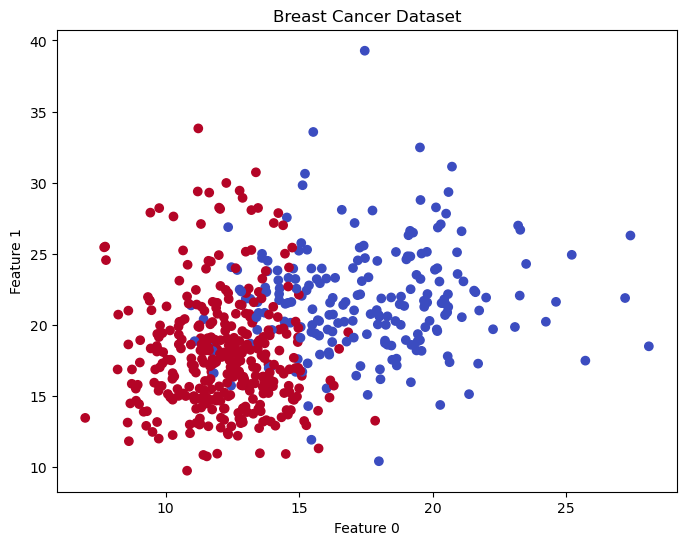

In [6]:
# Plotting the Breast Cancer dataset
plt.figure(figsize=(8, 6))  # Create a new figure with the specified size
plt.scatter(breast_cancer.data[:, 0], breast_cancer.data[:,
            1], c=breast_cancer.target, cmap='coolwarm')
# Scatter plot the Breast Cancer dataset
# breast_cancer.data[:, 0]: First feature (column) of the Breast Cancer dataset
# breast_cancer.data[:, 1]: Second feature (column) of the Breast Cancer dataset
# c=breast_cancer.target: Color the data points based on the target labels
# cmap='coolwarm': Use the coolwarm colormap for coloring
plt.title('Breast Cancer Dataset')  # Set the title of the plot
plt.xlabel('Feature 0')  # Set the x-axis label
plt.ylabel('Feature 1')  # Set the y-axis label
plt.show()  # Display the plot


In the above code, we visualize the imported datasets one by one using scatter plots. For each dataset, we create a separate figure and scatter plot using `plt.scatter`. We pass the features as the x and y coordinates, and the corresponding targets or labels for color mapping. The cmap parameter specifies the colormap to be used.

After plotting each dataset, we set the title, x-label, and y-label using `plt.title`, `plt.xlabel`, and `plt.ylabel`, respectively. Finally, we display the plot using `plt.show()`.

Now lets move on to th next section where we will learn and implement the learning algorithms.

Logistic regression is a statistical algorithm used for classification tasks, specifically to predict the probability of a binary outcome variable. It is commonly employed when the dependent variable has two categories, represented as 1 (indicating success) or 0 (indicating failure). In logistic regression, the goal is to estimate the probability P(Y=1) as a function of one or more independent variables, also known as features or predictors.

Multivariate logistic regression expands on this concept by incorporating multiple independent variables. By utilizing these variables, the logistic regression model establishes decision boundaries that can accommodate more than two classes. The model aims to find the relationship between the predictor variables and the categorical outcome, providing insights into how each independent variable contributes to the likelihood of the different outcomes.

Imagine you are trying to decide if it will rain or not based on the temperature outside. You notice that on hotter days, it tends to rain more often, and on colder days, it rarely rains. Logistic Regression helps us figure out the probability of an event happening, like rain, based on different factors.

Let's say we plot the temperature on a graph, where the x-axis represents temperature and the y-axis represents the probability of rain. We observe that as the temperature increases, the probability of rain also increases. We want to find a line that best fits the data points to help us predict the probability of rain at any given temperature.

Logistic Regression does this by drawing a straight line that tries to separate the data points into two groups: one group where rain is likely (let's call it "yes"), and another group where rain is unlikely (let's call it "no"). The line acts like a boundary that separates these two groups.

To draw this line, Logistic Regression uses a mathematical function called the sigmoid function. The sigmoid function takes any value and maps it to a value between 0 and 1. In our case, it gives us the probability of rain. If the probability is close to 0, it means rain is unlikely, and if it's close to 1, it means rain is very likely.

Logistic Regression learns the best line that separates the data points by adjusting its parameters during training. It finds the line that maximizes the likelihood of the observed data. Once the line is learned, we can use it to predict the probability of rain for new temperatures that were not part of the training data.

Logistic Regression is widely used because it is simple yet effective. It can handle both numerical and categorical input variables and is useful for classification tasks when we want to predict between two or more classes. It also allows us to interpret the relationship between the input variables and the predicted probabilities.

In summary, Logistic Regression helps us predict the probability of an event happening (like rain) based on different factors (like temperature). It draws a line that separates the data points into two groups and uses a sigmoid function to calculate the probabilities. By adjusting its parameters, it learns the best line that fits the data and allows us to make predictions.

In [7]:
def plot_decision_boundary(X, y, model):
    # Define the meshgrid range
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Make predictions on the meshgrid points
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary and data points with different colors
    plt.figure(figsize=(30, 15))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Blues)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set2)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary')
    plt.show()


Accuracy on the testing set: 1.000


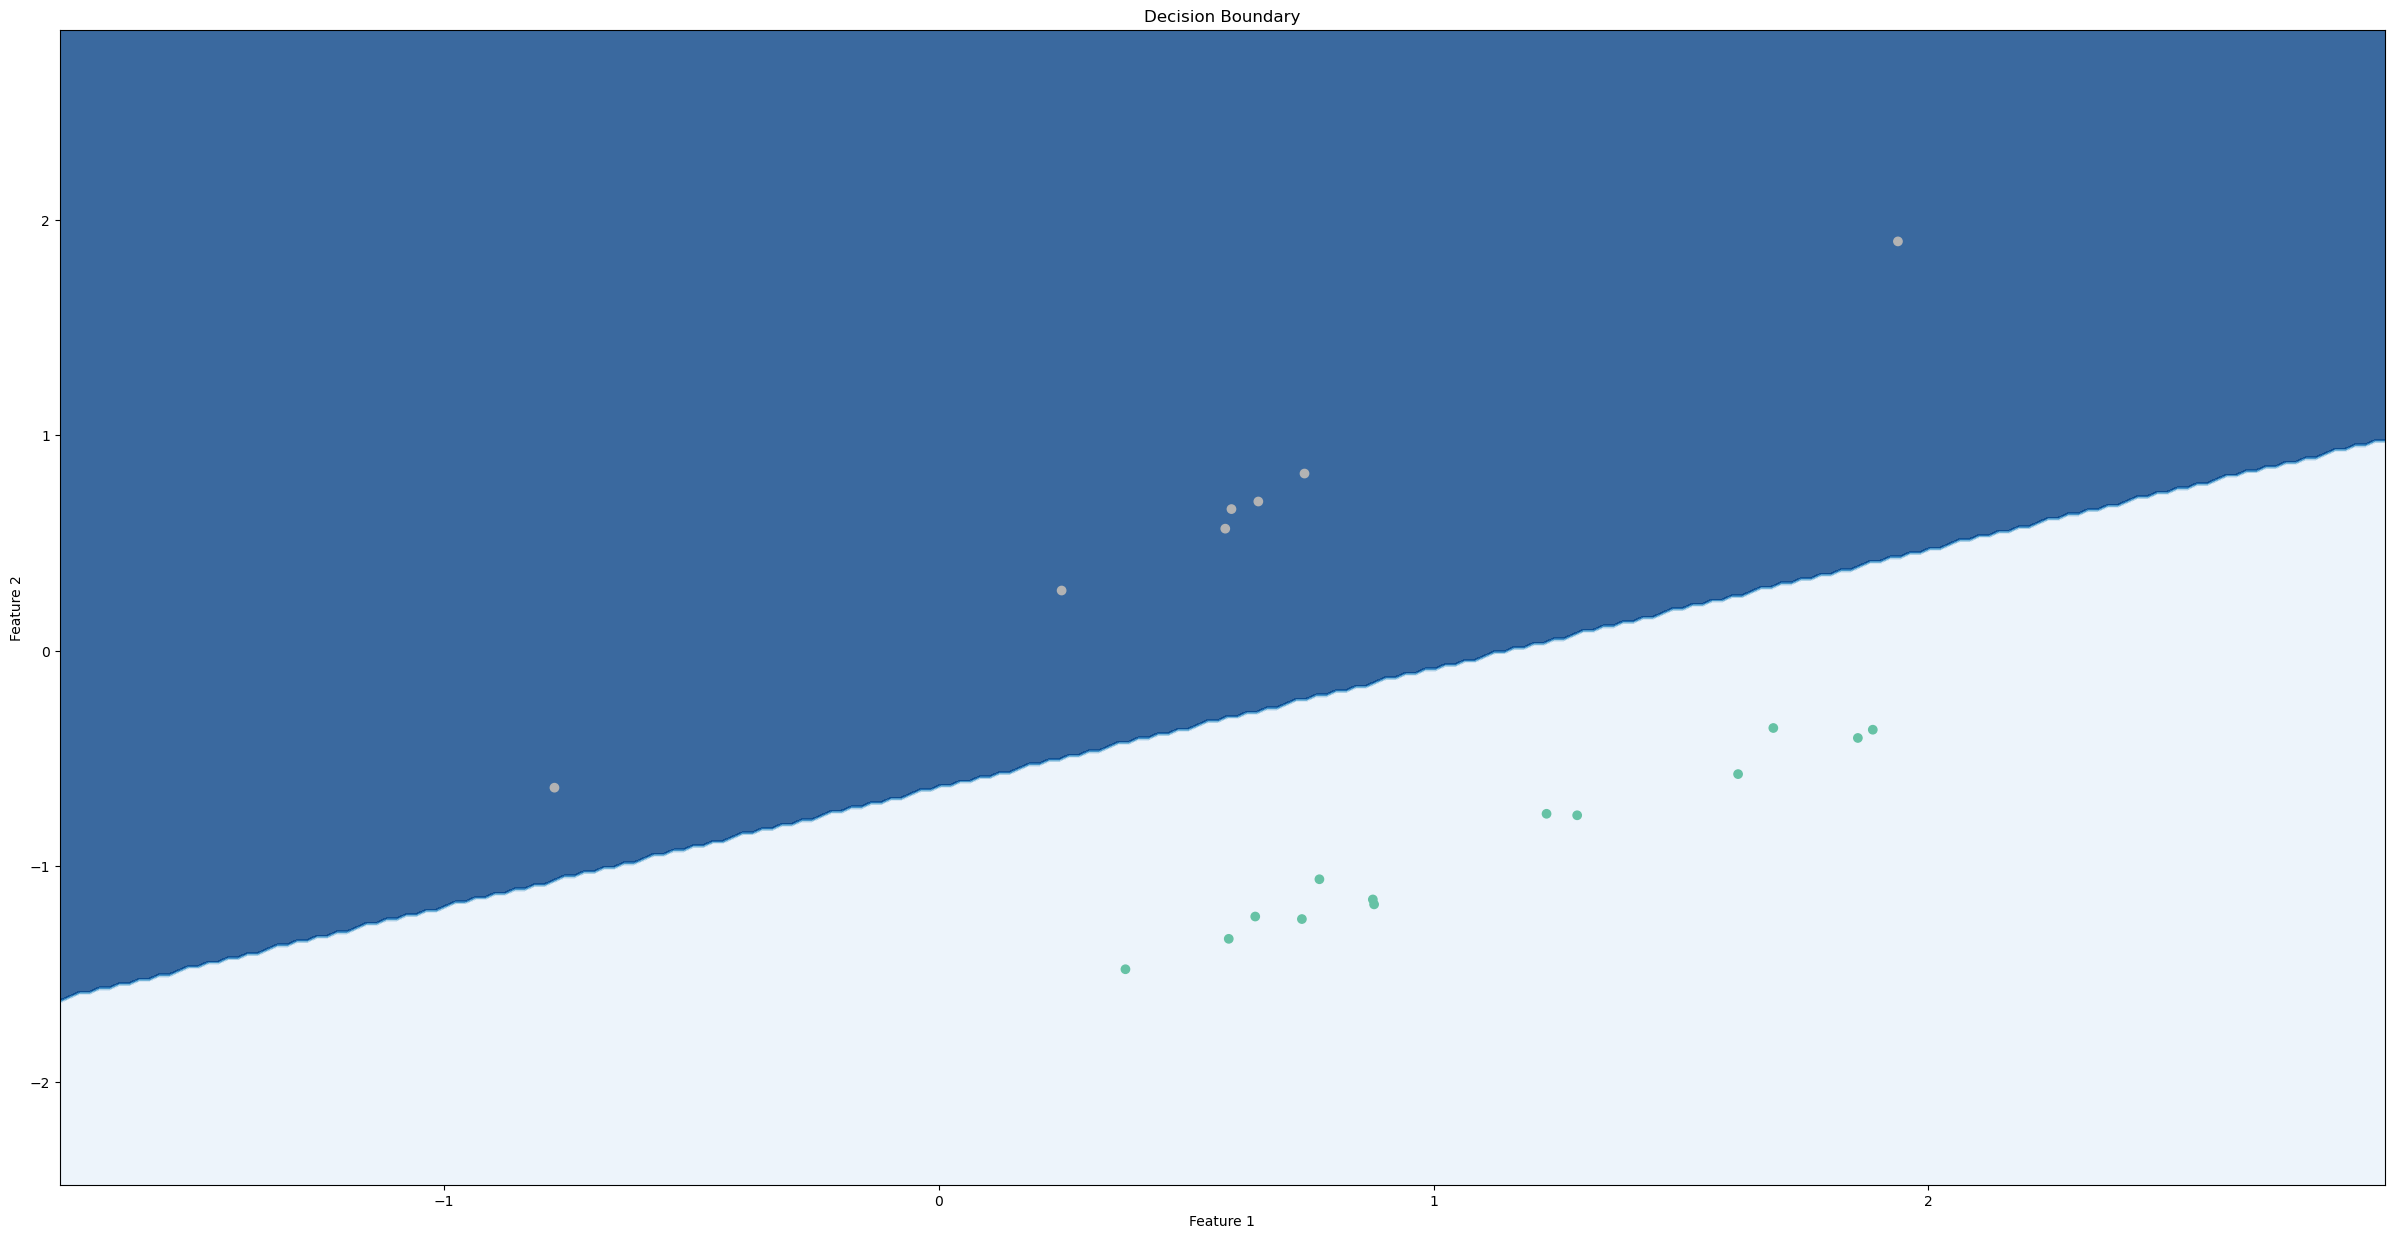

In [8]:
from sklearn.linear_model import LogisticRegression

# Splitting the random dataset into training and testing sets
X_train_random, X_test_random, y_train_random, y_test_random = train_test_split(
    X_random, y_random, test_size=0.2, random_state=42)

# Creating a Logistic Regression classifier
log_reg_random = LogisticRegression()  # Create a Logistic Regression classifier

# Training the Logistic Regression classifier
log_reg_random.fit(X_train_random, y_train_random)  # Fit the classifier to the training data

# Evaluating the Logistic Regression classifier on the testing set
print('Accuracy on the testing set: {:.3f}'.format(
    log_reg_random.score(X_test_random, y_test_random)))  # Print the accuracy of the classifier on the testing set

# Plotting the decision boundary
plot_decision_boundary(X_test_random, y_test_random, log_reg_random)  # Plot the decision boundary for the classifier


In the code above, we import the `LogisticRegression` class from `sklearn.linear_model` library to create a logistic regression classifier.

We then split the random dataset into training and testing sets using the `train_test_split` function. The `X_random` and `y_random` variables represent the feature matrix and target variable, respectively. The function splits the data into training and testing sets, with 80% of the data used for training and 20% for testing. The `random_state=42` parameter ensures reproducibility of the splitting process.

Next, we create an instance of the `LogisticRegression` classifier using the default parameters.

We proceed to train the logistic regression classifier using the training data by calling the `fit` method. This step involves fitting the model to the training data and learning the underlying patterns.

To evaluate the performance of the trained classifier, we use the `score` method to calculate the accuracy of the classifier on the testing set. The accuracy is printed using `print` statement.

Finally, we call the `plot_decision_boundary` function, passing in the testing data (`X_test_random` and `y_test_random`) and the trained logistic regression classifier (`log_reg_random`). This function plots the decision boundary of the classifier, visually illustrating how it separates the different classes in the data.


For the next dataset - Iris data - we look at another algo  -  Random Forest

Random Forest is a popular machine learning algorithm that belongs to the ensemble learning family. It is commonly used for both classification and regression tasks. The algorithm combines multiple decision trees to create a powerful predictive model.

The Random Forest algorithm works by creating a collection of decision trees, known as a forest. Each decision tree is trained on a random subset of the training data, as well as a random subset of the features. This randomness helps to introduce diversity among the trees and reduces overfitting, making the model more robust and accurate.

During training, each decision tree in the Random Forest independently makes predictions based on the features it was trained on. For classification tasks, the final prediction is determined through a voting process, where each tree's prediction is counted as a "vote." The class with the most votes becomes the predicted class label. For regression tasks, the final prediction is usually the average of the predictions from all the trees in the forest.

The strength of Random Forest lies in its ability to handle high-dimensional data, handle missing values, and provide an estimate of feature importance. It can effectively handle both categorical and numerical features without requiring extensive data preprocessing. The ensemble of decision trees helps to capture complex relationships and interactions between variables, making Random Forest a powerful and versatile algorithm.

Random Forest has become a popular choice in machine learning due to its robustness, scalability, and ability to handle a wide range of problem domains. It is widely used in various applications such as image classification, bioinformatics, fraud detection, and more. Additionally, Random Forest provides a measure of uncertainty in predictions, making it useful in assessing the model's reliability.

Random Forest is like a team of decision-makers working together to solve a problem. Imagine you want to decide what game to play. Instead of asking just one friend, you gather a group of friends who are good at different games. Each friend suggests a game based on their expertise. You then count the votes and choose the game with the most votes.

Similarly, in Random Forest, we have a group of decision trees, and each tree is like a friend with their own expertise. Decision trees are like flowcharts that ask questions about the data to make a prediction. Each tree in the Random Forest is built using a random subset of the data and a random subset of features.

When we want to make a prediction with Random Forest, we ask each decision tree in the forest for their prediction. Each tree gives its own answer, and then we count the votes to determine the final prediction. This voting process helps to reduce errors and make more accurate predictions.

Random Forest has several advantages. First, it is very good at handling complex tasks and large datasets. Second, it can handle both numerical and categorical features without requiring much data preprocessing. Third, it can provide estimates of feature importance, telling us which features are most influential in making predictions.

One key concept in Random Forest is the idea of "ensemble learning." Just like how a group of friends can make better decisions together than individually, Random Forest combines the knowledge and predictions of multiple decision trees to make more accurate predictions.

In summary, Random Forest is a powerful machine learning algorithm that uses a group of decision trees to make predictions. By leveraging the wisdom of the crowd, it improves accuracy and handles complex tasks effectively.

Accuracy on the testing set: 1.000


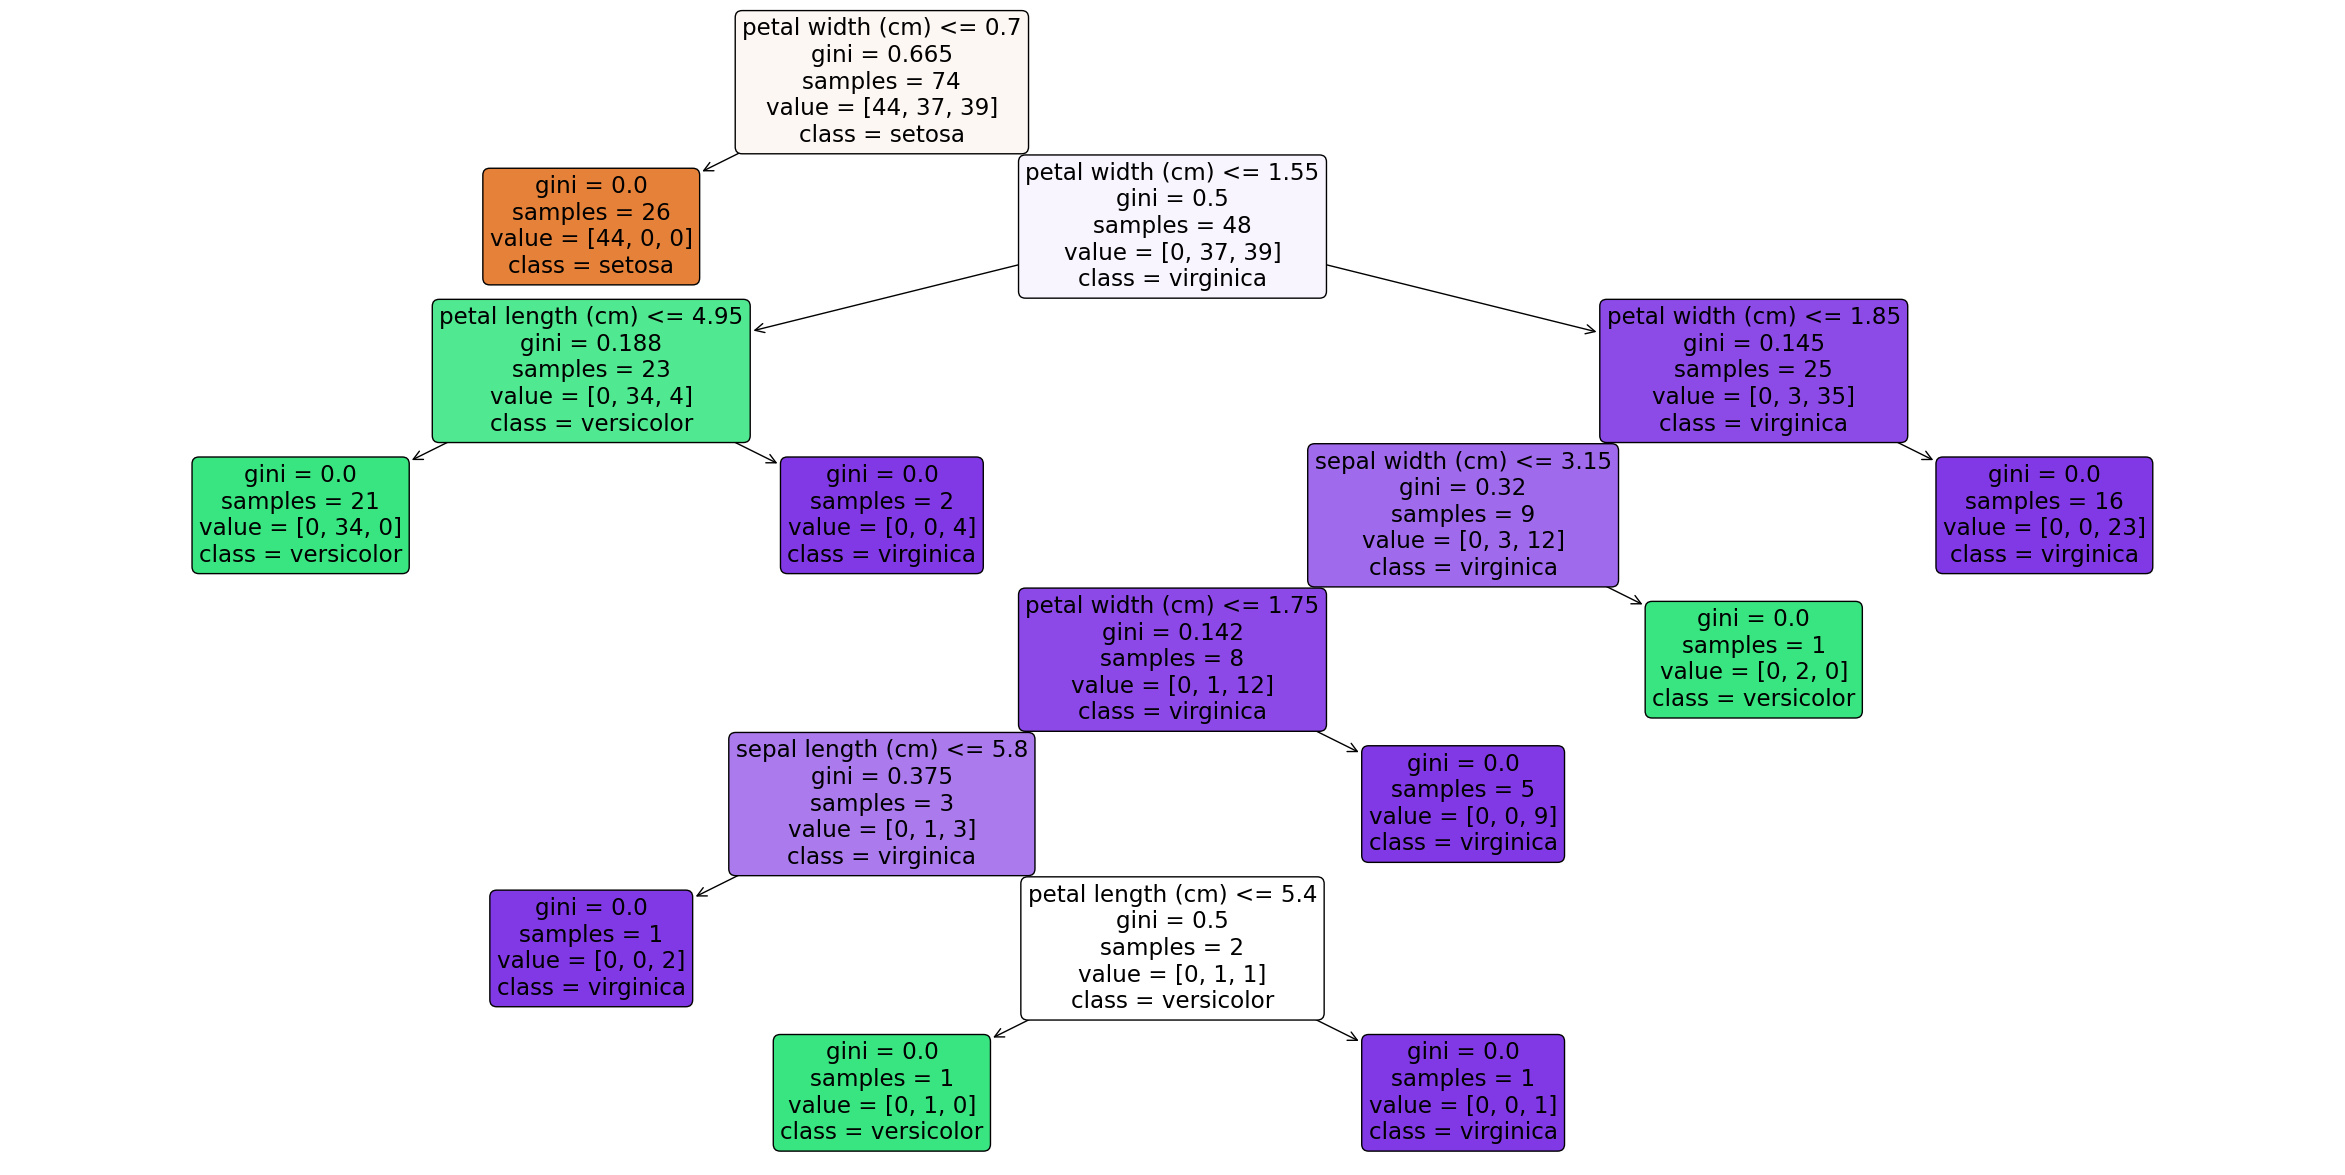

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree

# Splitting the Iris dataset into training and testing sets
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(
    iris.data, iris.target, test_size=0.2, random_state=42)

# Creating a Random Forest classifier
rf_iris = RandomForestClassifier(n_estimators=100, random_state=42)  # Create a Random Forest classifier

# Training the Random Forest classifier
rf_iris.fit(X_train_iris, y_train_iris)  # Fit the classifier to the training data

# Evaluating the Random Forest classifier on the testing set
print('Accuracy on the testing set: {:.3f}'.format(
    rf_iris.score(X_test_iris, y_test_iris)))  # Print the accuracy of the classifier on the testing set

tree = rf_iris.estimators_[0]  # Get the first decision tree in the Random Forest

# Plotting the first decision tree
plt.figure(figsize=(30, 15))
plot_tree(tree, feature_names=iris.feature_names, class_names=iris.target_names,
          filled=True, rounded=True)  # Plot the decision tree with filled and rounded nodes
plt.show()


In the code above, we import the `RandomForestClassifier` class from `sklearn.ensemble` and `plot_tree` function from `sklearn.tree`.

We then split the Iris dataset into training and testing sets using the `train_test_split` function. The `iris.data` and `iris.target` represent the feature matrix and target variable, respectively. The function splits the data into training and testing sets, with 80% of the data used for training and 20% for testing. The `random_state=42` parameter ensures reproducibility of the splitting process.

Next, we create an instance of the `RandomForestClassifier` with `n_estimators=100` to specify the number of decision trees in the random forest. We set `random_state=42` to ensure reproducibility.

We proceed to train the random forest classifier using the training data by calling the `fit` method. This step involves fitting the model to the training data and learning the underlying patterns.

To evaluate the performance of the trained classifier, we use the `score` method to calculate the accuracy of the classifier on the testing set. The accuracy is printed using `print` statement.

We then extract the first decision tree from the random forest using `rf_iris.estimators_[0]` and assign it to the variable `tree`.

Finally, we plot the first decision tree using `plt.figure` to create a figure with a specified size, and `plot_tree` function to visualize the decision tree. We pass in the feature names (`iris.feature_names`) and class names (`iris.target_names`) to provide labels for the tree. The `filled=True` and `rounded=True` parameters are used to create a filled and rounded visualization of the tree. The decision tree plot is displayed using `plt.show()`.

Next Dataset - Breast Cancer on KMeans Clustering

K-means clustering is a popular unsupervised machine learning algorithm used for grouping data into clusters. It aims to partition a given dataset into K distinct clusters, where each data point belongs to the cluster with the nearest mean value.

The algorithm works as follows:

1. **Initialization**: Randomly select K data points as the initial centroids of the clusters.
2. **Assignment**: Assign each data point to the nearest centroid based on a distance metric, commonly Euclidean distance.
3. **Update**: Recalculate the centroids of each cluster by taking the mean of the data points assigned to that cluster.
4. **Iteration**: Repeat steps 2 and 3 until convergence or a maximum number of iterations is reached.
5. **Termination**: The algorithm converges when the centroids no longer change significantly, or the maximum number of iterations is reached.

K-means clustering aims to minimize the within-cluster sum of squares, also known as inertia or distortion. The algorithm seeks to find centroids that minimize the total distance between data points and their assigned centroid, ensuring that data points within the same cluster are similar to each other.

One important consideration in K-means clustering is determining the optimal value of K, the number of clusters. There are various methods to estimate the optimal K, such as the elbow method or silhouette analysis, which evaluate the quality of clustering.

K-means clustering is widely used in various domains, including customer segmentation, image compression, anomaly detection, and document clustering. It is a simple and computationally efficient algorithm that can handle large datasets. However, it is sensitive to the initial centroid placement and can converge to suboptimal solutions.

Imagine you have a bunch of toys and you want to organize them into different groups based on how similar they are. K-means clustering helps you do that!

First, you decide how many groups you want to create. Let's say you want to make 3 groups. You randomly pick 3 toys to be the "leaders" of each group. Now you take each toy and see which leader it is closest to. You put the toy in the group of the closest leader.

Next, you move the leaders to the center of their groups. Now, you repeat the process: you check the distance between each toy and the leaders, and put the toy in the group of the closest leader.

You keep doing this over and over again, moving the leaders to the center and reassigning the toys to the closest group. Eventually, the groups stop changing, and you have your final clusters.

The idea behind K-means clustering is to minimize the differences within each group. Toys in the same group are more similar to each other than to toys in other groups. The leaders represent the center of each group, and by moving them to the center, you try to make the groups as compact as possible.

K-means clustering is used in many areas, not just with toys! It helps in organizing and grouping things based on their similarities. For example, it can be used to group customers with similar buying habits, to find patterns in data, or to segment images into different regions.

In summary, K-means clustering is a way to group things together based on their similarities. You start with some leaders, assign each item to the closest leader, and keep adjusting the leaders until the groups stay the same. It helps you organize and make sense of data in a simpler way.

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


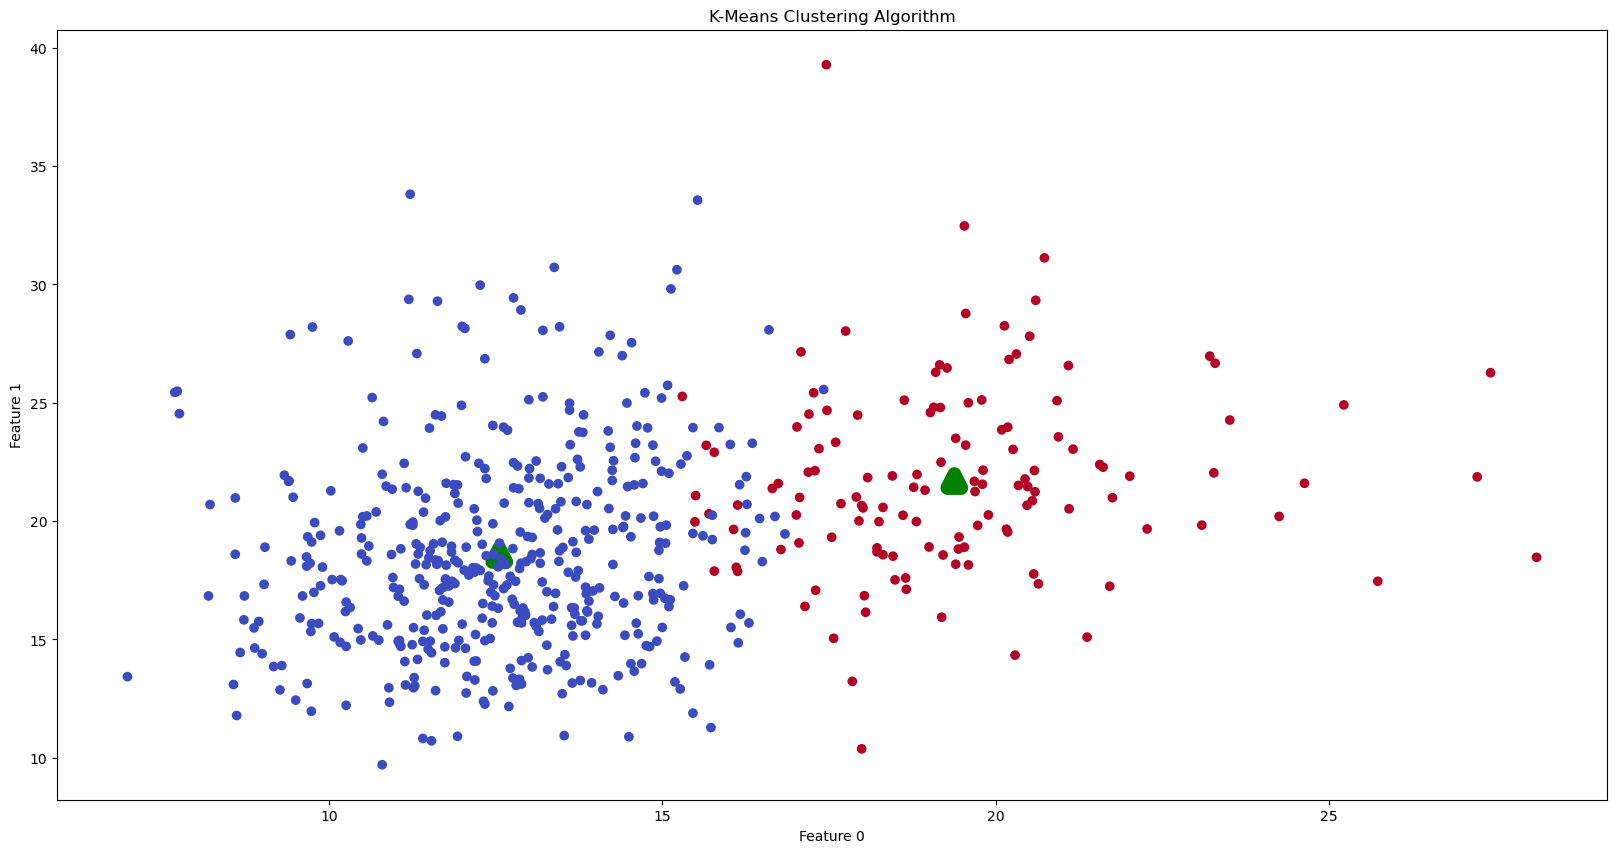

In [10]:
from sklearn.cluster import k_means

# Applying K-Means clustering algorithm to the Breast Cancer dataset
kmeans_cancer = k_means(breast_cancer.data, n_clusters=2, random_state=42)

# Plot the K-Means clustering algorithm
plt.figure(figsize=(20, 10))

# Plot the centroids of the clusters
plt.scatter(kmeans_cancer[0][:, 0], kmeans_cancer[0][:, 1], marker='^', s=100, c=["green", "green"], linewidth=10)
# The centroids of the clusters are represented by green triangles ('^') with size 100

# Plot the data points
plt.scatter(breast_cancer.data[:, 0], breast_cancer.data[:, 1], c=kmeans_cancer[1], cmap='coolwarm')
# The data points are plotted with colors determined by the cluster labels (kmeans_cancer[1]) using the 'coolwarm' colormap

plt.title('K-Means Clustering Algorithm')  # Set the title of the plot
plt.xlabel('Feature 0')  # Set the label for the x-axis
plt.ylabel('Feature 1')  # Set the label for the y-axis

plt.show()  # Display the plot


In the code above, we import the `k_means` function from `sklearn.cluster`.

We apply the K-Means clustering algorithm to the Breast Cancer dataset by calling `k_means` function and passing `breast_cancer.data` as the input data. We specify `n_clusters=2` to indicate that we want to find 2 clusters in the data. The `random_state=42` parameter ensures reproducibility of the clustering process.

In [11]:
from sklearn.metrics import classification_report, confusion_matrix

# Predicting the target values for the testing set using the trained classifier
y_pred = log_reg_random.predict(X_test_random)

# Calculating the classification report
classification_rep = classification_report(y_test_random, y_pred)
print("Classification Report:")
print(classification_rep)

# Calculating the confusion matrix
conf_matrix = confusion_matrix(y_test_random, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         7

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

Confusion Matrix:
[[13  0]
 [ 0  7]]


In [12]:
# Predicting the target values for the testing set using the trained classifier
y_pred_iris = rf_iris.predict(X_test_iris)

# Calculating the classification report
classification_rep_iris = classification_report(y_test_iris, y_pred_iris)
print("Classification Report:")
print(classification_rep_iris)

# Calculating the confusion matrix
conf_matrix_iris = confusion_matrix(y_test_iris, y_pred_iris)
print("Confusion Matrix:")
print(conf_matrix_iris)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


Classification Report Metrics:
- Precision: Precision is the ratio of true positive predictions to the total number of positive predictions. It measures the accuracy of the positive predictions.
- Recall: Recall is the ratio of true positive predictions to the total number of actual positive instances. It measures the ability of the model to correctly identify positive instances.
- F1-Score: The F1-score is the harmonic mean of precision and recall. It provides a balanced measure of precision and recall.
- Support: Support is the number of occurrences of each class in the true target values.

Confusion Matrix:
A confusion matrix is a table that describes the performance of a classification model on a set of test data for which the true values are known. It provides insights into the number of correct and incorrect predictions made by the model.

The confusion matrix is a 2x2 matrix with four cells representing different combinations of actual and predicted class labels:
- True Positive (TP): The number of observations that are correctly predicted as positive.
- True Negative (TN): The number of observations that are correctly predicted as negative.
- False Positive (FP): The number of observations that are incorrectly predicted as positive (a type I error).
- False Negative (FN): The number of observations that are incorrectly predicted as negative (a type II error).

The confusion matrix helps evaluate the performance of a classification model by providing information about the accuracy, precision, recall, and other metrics. It can be used to calculate additional evaluation measures such as accuracy, precision, recall, and F1-score.

Interpreting the confusion matrix allows us to understand the strengths and weaknesses of the model's predictions and identify areas where the model may be making errors.

It is important to consider both the metrics from the classification report and the information provided by the confusion matrix to gain a comprehensive understanding of the performance of a classification model.